In [1]:
import matplotlib.pyplot as plt
import numpy as npn
from grape.embedders import FirstOrderLINEEnsmallen
from grape import Graph
from glob import glob

import random

/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
RANDOM_SEED = 12
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

random_seed = random.seed
print(random.seed)
print(np.random.get_state())

In [2]:

node_path = glob("../data/merged/merged-kg_nodes.tsv", recursive=True)[0]
edge_path = glob("../data/merged/merged-kg_edges.tsv", recursive=True)[0]

In [4]:
kg_microbe = Graph.from_csv(
    # Edges related parameters

    ## The path to the edges list tsv
    edge_path=edge_path,
    ## Set the tab as the separator between values
    edge_list_separator="\t",
    ## The first rows should NOT be used as the columns names
    edge_list_header=True,
    ## The source nodes are in the first nodes
    sources_column="subject",
    #sources_column_number=1,
    ## The destination nodes are in the second column
    destinations_column="object",
    #destinations_column_number=4,
    ## Both source and destinations columns use numeric node_ids instead of node names
    edge_list_numeric_node_ids=False,
    ## The weights are in the third column
    weights_column_number=None,

    #edge_type_path=edge_path,
    edge_list_edge_types_column="predicate",    

    # Nodes related parameters
    ## The path to the nodes list tsv
    node_path=node_path,
    ## Set the tab as the separator between values
    node_list_separator="\t",
    ## The first rows should be used as the columns names
    node_list_header=True,
    ## The column with the node names is the one with name "node_name".
    nodes_column="id",
    #nodes_column_number=1,

    #node_type_path=node_path,
    node_list_node_types_column="category",
    
    # Graph related parameters
    ## The graph is undirected
    directed=False,
    ## The name of the graph is HomoSapiens
    name="kg_microbe",
    ## Display a progress bar, (this might be in the terminal and not in the notebook)
    verbose=True,
)

In [5]:
kg_microbe


<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>kg_microbe</h2><p class="paragraph">The undirected multigraph kg_microbe has 1.11M heterogeneous nodes and 1.52M heterogeneous edges. The graph contains 28.00K connected components (of which 27.93K are disconnected nodes), with the largest one containing 1.08M nodes and the smallest one containing a single node. The RAM requirements for the nodes and edges data structures are 134.96MB and 21.04MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 33.70K, the mode degree is 1, the mean degree is 2.75 and the node degree median is 1.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=49928' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:49928'>NCBITaxon:49928</a> (degree 33.70K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=185979' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:185979'>NCBITaxon:185979</a> (degree 30.31K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=196821' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:196821'>NCBITaxon:196821</a> (degree 27.67K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=48479' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:48479'>NCBITaxon:48479</a> (degree 24.11K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>) and <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=2593676' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:2593676'>NCBITaxon:2593676</a> (degree 22.66K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 19 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a> (824.03

In [6]:
kg_microbe = kg_microbe.remove_disconnected_nodes()

In [7]:
kg_microbe

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>kg_microbe</h2><p class="paragraph">The undirected multigraph kg_microbe has 1.08M heterogeneous nodes and 1.52M heterogeneous edges. The graph contains 68 connected components, with the largest one containing 1.08M nodes and the smallest one containing 2 nodes. The RAM requirements for the nodes and edges data structures are 133.11MB and 20.82MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 33.70K, the mode degree is 1, the mean degree is 2.82 and the node degree median is 1.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=49928' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:49928'>NCBITaxon:49928</a> (degree 33.70K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=185979' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:185979'>NCBITaxon:185979</a> (degree 30.31K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=196821' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:196821'>NCBITaxon:196821</a> (degree 27.67K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=48479' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:48479'>NCBITaxon:48479</a> (degree 24.11K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>) and <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=2593676' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:2593676'>NCBITaxon:2593676</a> (degree 22.66K and node type <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 19 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/OrganismTaxon.html' target='_blank' title='Go to BioLink to get more informations about biolink:OrganismTaxon'>biolink:OrganismTaxon</a> (823.83K nodes, 76.26%), <a href='https://biolink.github.i

In [8]:
%%time
from grape.embedders import DeepWalkSkipGramEnsmallen

model = DeepWalkSkipGramEnsmallen(
    normalize_by_degree=True
)

degree_normalized_deepwalk_embedding = model.fit_transform(kg_microbe)

CPU times: user 1d 12h 35min 42s, sys: 4min 1s, total: 1d 12h 39min 43s
Wall time: 1d 4h 57min 10s


In [9]:
type(degree_normalized_deepwalk_embedding)

embiggen.utils.abstract_models.embedding_result.EmbeddingResult

In [10]:
import datetime

import pickle
import pandas as pd

current_datetime = datetime.datetime.now()
formatted_date = current_datetime.strftime("%Y-%m-%d_%H_%M_%S")

with open('DeepWalkSkipGramEnsmallen_degreenorm_embedding_'+formatted_date+'.pkl', 'wb') as file:
    # Use the 'wb' mode to write in binary mode
    pickle.dump(degree_normalized_deepwalk_embedding, file)


In [11]:
node_embed = degree_normalized_deepwalk_embedding.get_all_node_embedding()#to_csv(formatted_date+".tsv",sep="\t")

In [12]:
node_embed[1]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
NCBITaxon:1000003,-0.851284,0.988857,0.371988,-1.214423,0.268440,0.415412,1.156210,3.355280,0.595030,2.313853,...,1.857498,-1.404233,-0.263133,-1.065219,0.319012,-0.311994,0.958230,3.430695,0.509267,1.592615
NCBITaxon:1000010,-0.829608,1.244923,-1.224069,0.476604,-0.947860,0.627461,0.869151,0.402238,0.197349,-0.401606,...,0.419021,0.421658,-1.251403,-1.795962,-1.580469,0.866128,0.632690,2.538226,-0.402535,0.114112
NCBITaxon:1000018,-2.184090,-2.246455,-0.275248,-1.365230,0.978455,0.640932,1.945370,4.054640,-2.357964,2.762495,...,2.169084,-1.206666,-1.090588,0.582834,0.581564,-1.147194,2.670822,2.548922,3.287714,0.368422
NCBITaxon:1000025,-0.732894,-1.169684,0.234325,-0.850819,0.017477,1.641452,0.107905,2.603926,0.010028,0.617788,...,2.087486,-3.625146,-1.904850,0.770218,-1.823285,0.713638,1.886540,3.502179,1.058140,0.029119
NCBITaxon:1000032,3.059520,1.342080,1.604109,-1.334065,0.015293,-0.523136,0.756624,3.455146,-3.216451,0.835972,...,0.265562,-1.056380,-1.488469,-0.743376,0.029394,0.374867,1.028236,1.747947,1.130074,0.605635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCBITaxon:1659714,1.243117,-0.947247,-1.173451,-0.129000,0.579661,1.990377,1.568887,1.804997,0.836340,0.826854,...,1.538858,-1.052069,-1.159192,-1.298251,-0.026122,0.498160,1.337344,1.443885,1.448357,0.287928
NCBITaxon:1870946,1.721317,-1.331585,-0.380885,0.199079,1.057520,1.352228,0.816803,2.050873,0.692222,0.598289,...,1.916509,-0.962924,-1.572387,-1.105794,-0.263860,0.346044,1.662415,1.505355,1.524117,0.331351
NCBITaxon:1870956,1.853584,-1.377037,-0.807550,0.109291,1.025742,2.130585,0.881312,1.619169,0.796440,0.537708,...,1.660294,-1.096766,-1.666212,-1.308544,0.241269,0.294879,1.871052,1.288712,1.587830,-0.404584
NCBITaxon:1967661,1.434538,-1.525860,-1.160817,-0.149080,0.347281,1.425932,0.928340,1.587843,1.054680,0.743261,...,1.539290,-1.178815,-1.249957,-0.754260,-0.100542,0.849967,1.272003,1.876271,1.900160,0.189842


In [13]:
node_embed_df = pd.DataFrame(node_embed[0])
node_embed_df.to_csv("DeepWalkSkipGramEnsmallen_degreenorm_embedding_"+formatted_date+".tsv", sep="\t")

In [14]:
node_embed_df = pd.DataFrame(node_embed[1])
node_embed_df.to_csv("DeepWalkSkipGramEnsmallen_degreenorm_embedding_1_"+formatted_date+".tsv", sep="\t")

/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)
/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


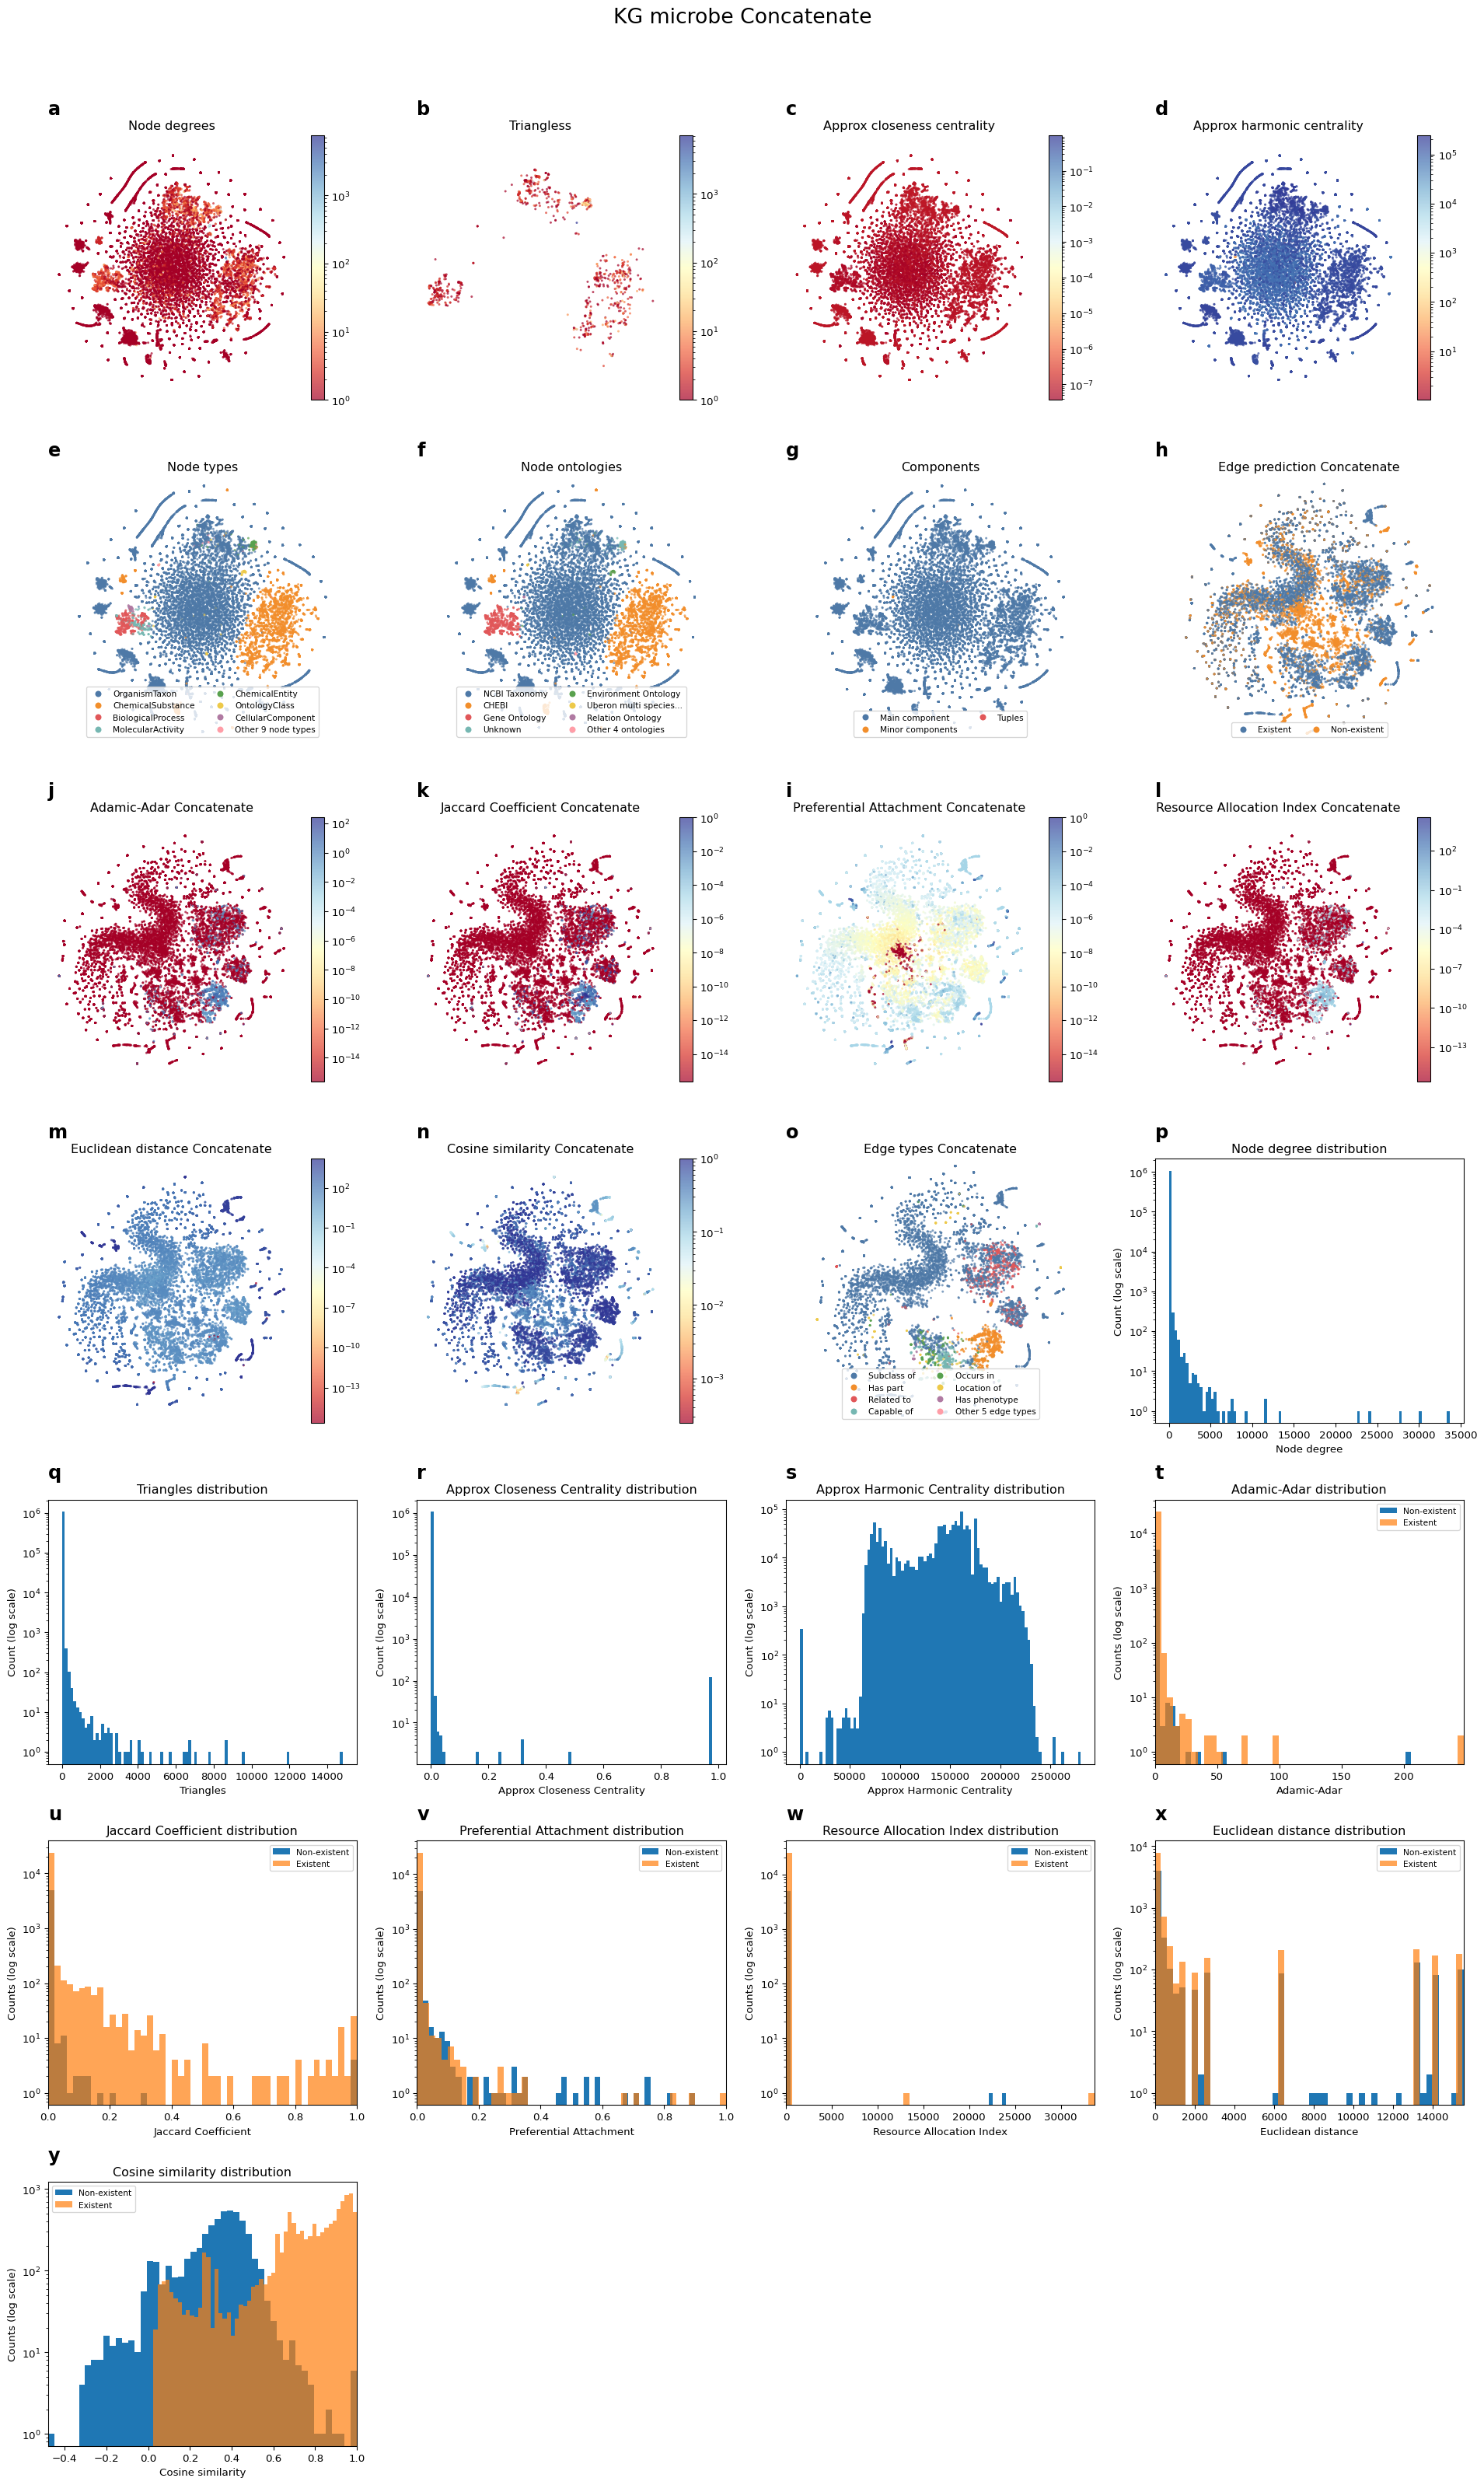

In [15]:
from grape import GraphVisualizer

GraphVisualizer(kg_microbe).fit_and_plot_all(degree_normalized_deepwalk_embedding)
